# Практическая работа №2: Исследование однородного линейного уравнения с периодическими коэффициентами.

Cтудентка гр. 9382 Балаева Милана, вариант 1.

## Цель работы

Изучение устойчивости однородного линейного уравнения с периодическими коэффициентами при $t \rightarrow +\infty$.

## Основные теоретические положения

Системой однородных линейных дифференциальных уравнений с периодическими коэффициентами называется система однородных линейных ОДУ следующего вида:

$$ X' = A(t) X, \;\; A(t + T) = A(t), \;\; t \ge 0 \;\;\;\;\;\;\;\; (0) $$
$$ X' = (x_1', \dots, x_n')^T, \;\; X = (x_1, \dots, x_n)^T, \;\; A(t) = || a_{ij}(t) ||, \;\; a_{ij}(t + T) = a_{ij}(t)$$

Число $T > 0$ называют периодом коэффициентов системы $(0)$.

Фундаментальной матрицей системы $(0)$ называется такая матрица $\Phi(t)$, что ее стобцы являются линейно независимыми решениями системы $(0)$. В матричном виде: $\Phi' = A(t)\Phi$.

Основной матрицей для фундаментальной матрицы $\Phi(t)$ называется такая матрица $C$, что $\Phi(t + T) = \Phi(t)C, \; \forall t \ge 0$.

Спектральным радиусом матрицы $C$ называется число $r(C) = \max\limits_{i}|\lambda_i|$, где $\lambda_i$ - собственные числа матрицы $C$.

## Постановка задачи

Дано дифференциальное уравнение:

$$ x'' + a(p,t)x = 0, \;\; a(p,t) = p + b(t), \;\; b(t + T) = b(t), $$

где $p$ - параметр.

Данное уравнение сводится к системе двух уравнений I-го порядка:

$$
\begin{cases}
    u'_1 = u_2, \\
    u'_2 = -a(p,t)u_1;
\end{cases}
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; (1)
$$

Здесь $u_1(t) = x(t), \; u_2(t) = x'(t)$.

Необходимо провести исследование устойчивости однородного линейного уравнения. Дальнейшие рассуждения применимы к любой линейной периодической системе, а не только к системе вида $(1)$.

## Схема решения

1. Задаем массив значений параметра $p$. Например, $p$ меняется от $0.1$ до $5$ с шагом $0.05$. Для каждого значения $p$ проделаем следующие действия:

2. Вычисляем значение фундаментальной матрицы системы $(1)$ при $t = T$ с помощью любой программы численного решения задачи
Коши.
Для этого решаем две задачи Коши с начальными векторами $V_1 = (1, 0)^T$ и $V_2 = (0, 1)^T$ на отрезке $[0, T]$. Пусть вектор-функции $U(t, V_1), \; U(t, V_2)$ – решения этих задач. Они являются столбцами фундаментальной матрицы $\Phi(t)$, удовлетворяющей условию $\Phi(0) = E$. Основную матрицу $C$ для $\Phi(t)$ получаем из формулы $C = \Phi(T)$.
Столбцы матрицы $C$ это векторы $U(T, V_1), U(T, V_2)$;

3. Вычисляем собственные числа матрицы 𝐶 и ее спектральный радиус, т.е.
$$ r(p) = \max\limits_{j = 1,2}|\lambda_j|.$$
В результате имеем массив значений $r(p)$;

4. Вывод об устойчивости или неустойчивости делается в зависимости от значения $r(p)$.

Рекомендуется построить график этой зависимости, из которого с достаточной точностью можно определить точку 𝑝0, которая разделяет зоны устойчивости и неустойчивости, в которых $r \le 1$ и $r \gt 1$. Более точно
вычисляется методом половинного деления.

Матрицу $C$ можно найти только приближенно, решая численно две задачи Коши.

## Выполнение работы


Функция $b(t)$ задана следующим выражением:

$$ b(t) = tg(1 + 0.2sin3t)\:,\:  T=\frac{2\pi}{3} $$ 

1.

In [52]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import math

p = np.arange(0.1 , 5, 0.05)
p0 = -1
T = (2*math.pi)/3
t = np.arange(0, T, 0.001)
ran =[]
v1 = [1, 0]
v2 = [0, 1]


def b(t):
  return np.tan(1+0.2 * np.sin(3*t))

def a(p,t):
   return p + b(t)

def tmp(u, t):
    return [u[1],-a(i,t)*u[0]] 


2.

In [53]:
for i in p:
 sol1 = integrate.odeint(tmp, v1, t)
 sol2 = integrate.odeint(tmp, v2, t)
 C = np.array([sol1[-1], sol2[-1]])
 ran.append(max(abs(np.linalg.eigvals(C))))  

3.

In [54]:
for i in range(1, len(ran)):
    if abs(ran[-i] - 1) > 0.0001:
        p0 = p[1 - i]
        break

4.

0.9500000000000003


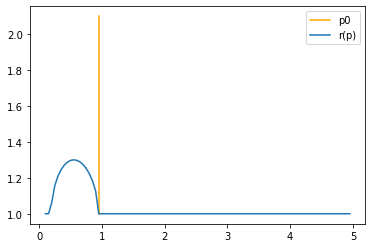

In [57]:
print(p0)
plt.plot([p0, p0], [0.999, 2.1], color="orange", label="p0")
plt.plot(p, ran, label="r(p)")
plt.legend()
plt.show()





##Вывод
Было проведено исследование однородного линейного уравнения с периодическими коэффициентами. Была определена граница между зонами устойчивости и неустойчивости.